# 航空公司客户价值识别分析

## 数据探索

In [26]:
import pandas as pd

#录入数据文件
datafile = '../data/air_data.csv'
resultfile = '../tmp/explore.xls' 

data = pd.read_csv(datafile,encoding='utf-8')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [37]:
#对所得数据属性、范围以及空值数量等做一个大概了解和分析
print(data.dtypes)
explore = data.describe(percentiles=[], include='all').T
explore['null'] = len(data) - explore['count']
explore.head()

explore = explore[['null', 'max', 'min']]
explore.columns = [u'空值数', u'最大值', u'最小值']  
explore.to_excel(resultfile)

MEMBER_NO                    int64
FFP_DATE                    object
FIRST_FLIGHT_DATE           object
GENDER                      object
FFP_TIER                     int64
WORK_CITY                   object
WORK_PROVINCE               object
WORK_COUNTRY                object
AGE                        float64
LOAD_TIME                   object
FLIGHT_COUNT                 int64
BP_SUM                       int64
EP_SUM_YR_1                  int64
EP_SUM_YR_2                  int64
SUM_YR_1                   float64
SUM_YR_2                   float64
SEG_KM_SUM                   int64
WEIGHTED_SEG_KM            float64
LAST_FLIGHT_DATE            object
AVG_FLIGHT_COUNT           float64
AVG_BP_SUM                 float64
BEGIN_TO_FIRST               int64
LAST_TO_END                  int64
AVG_INTERVAL               float64
MAX_INTERVAL                 int64
ADD_POINTS_SUM_YR_1          int64
ADD_POINTS_SUM_YR_2          int64
EXCHANGE_COUNT               int64
avg_discount        

## 数据清洗

In [28]:
import pandas as pd

datafile = '../data/air_data.csv'  
cleanedfile = '../tmp/data_cleaned.csv'  
cleanedfile2 = '../tmp/data_cleaned.xls' 

data = pd.read_csv(datafile, encoding='utf-8')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [39]:
#去除票价为空值、零值的行
data = data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM']=='0') & (data['avg_discount']=='0')
data = data[index1|index2|index3]

# 导出数据到csv文件
data.to_csv(cleanedfile, encoding='utf-8')  # 导出结果
data.to_excel(cleanedfile2)
print('END')


END


## 数据规约

In [62]:
import pandas as pd

datafile = '../tmp/data_cleaned.xls'  # 需要进行标准化的数据文件；
zscoredfile = '../tmp/zscoreddata.xls'  # 标准差化后的数据存储路径文件；

#选择LRFMC模型指标祥光的六个属性：
#FFP_DATE,LOAD_TIME,FLIGHT_COUNT,AVG_DISCOUNT,SEG_KM_SUM

data = pd.read_excel(datafile)
data = data[list(['FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT',
                  'avg_discount','SEG_KM_SUM'])]
data.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,avg_discount,SEG_KM_SUM
0,2006/11/02,2014/03/31,1,210,0.961639,580717
1,2007/02/19,2014/03/31,7,140,1.252314,293678
2,2007/02/01,2014/03/31,11,135,1.254676,283712
3,2008/08/22,2014/03/31,97,23,1.090870,281336
4,2009/04/10,2014/03/31,5,152,0.970658,309928


In [91]:
from datetime import datetime
import pandas as pd
import cycler

#L为会员入会时间距观测窗口结束的月数
#等于观测窗口的结束时间-入会时间

data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])
data['L'] = (data['LOAD_TIME']-data['FFP_DATE'])
data['L'] = data['L'].astype("str").str.split().str[0]
data['L'] = round(data['L'].astype("int")/30 ,2)

#去除日期列，并且重命名列名
data_new = data.iloc[:,2:]
data_new.columns = ['R','F','C','M','L']
data_new['R'] = round(data_new['R']/30,2)

data_new.describe()

,R,F,C,M,L
count,62044.000000,62044.000000,62044.000000,62044.000000,62044.000000
mean,5.751064,11.971359,0.722180,17321.694749,49.623035
std,6.050889,14.110619,0.184833,21052.728111,28.262726
min,0.030000,2.000000,0.136017,368.000000,12.170000
25%,0.970000,3.000000,0.613085,4874.000000,24.500000
50%,3.500000,7.000000,0.712162,10200.000000,42.600000
75%,8.670000,15.000000,0.809293,21522.500000,72.730000
max,24.370000,213.000000,1.500000,580717.000000,114.570000


In [92]:
#标准化处理
datafile = '../data/zscoredata.xls'  # 需要进行标准化的数据文件；
zscoredfile = '../tmp/zscoreddata.xls'  # 标准差化后的数据存储路径文件；

data_zs = (data_new - data_new.mean(axis=0))/data_new.std(axis=0)
data_zs.columns = ['Z' + i for i in data_zs.columns]

print(data_zs.describe())
data_zs.to_excel(zscoredfile, index=False)  # 数据写入
print('END')


                 ZR            ZF            ZC            ZM            ZL
count  6.204400e+04  6.204400e+04  6.204400e+04  6.204400e+04  6.204400e+04
mean  -8.292477e-15  9.484995e-16 -2.926822e-14 -2.033474e-15 -8.990353e-15
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -9.454915e-01 -7.066564e-01 -3.171310e+00 -8.052968e-01 -1.325174e+00
25%   -7.901424e-01 -6.357878e-01 -5.902330e-01 -5.912628e-01 -8.889105e-01
50%   -3.720220e-01 -3.523133e-01 -5.419946e-02 -3.382789e-01 -2.484911e-01
75%    4.823980e-01  2.146356e-01  4.713039e-01  1.995373e-01  8.175774e-01
max    3.077058e+00  1.424662e+01  4.208225e+00  2.676115e+01  2.297972e+00
END


## 识别模型构建（K-Mean clustering）

In [99]:
from sklearn.cluster import KMeans

inputfile = '../tmp/zscoreddata.xls' 
data = pd.read_excel(inputfile)  # 读取数据
k = 5  

model = KMeans(n_clusters=k,n_jobs=4)
model.fit(data)


array([0, 0, 0, ..., 2, 4, 4])

         ZR        ZF        ZC        ZM        ZL   类别数目
0  1.686139 -0.573969 -0.173112 -0.536753 -0.314120  12123
1 -0.799435  2.482617  0.308639  2.423912  0.483126   5338
2 -0.002000 -0.227301  2.192078 -0.230878  0.055188   4186
3 -0.414981 -0.161068 -0.254362 -0.160945 -0.700141  24662
4 -0.376999 -0.087216 -0.157220 -0.095208  1.160898  15735


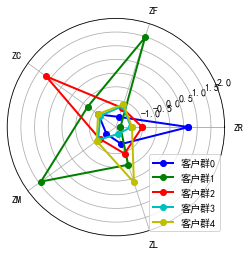

END


In [97]:
from cluster_plot import print_cluster_result, plot_cluster

print_cluster_result(data, model)
plot_cluster(data, model)  #画图函数借鉴cluster_plot.py 
print('END')

